In [1]:
# Import the necesary libraries
import numpy as np
import pandas as pd
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from scripts.path import return_path
PATH = return_path() + 'other_data/'

Using the Youtube Comments Data, perform the text visualization and analysis to determine the most frequent and common comments in the music video of Katy Perry. From the analysis result, can you say that most of the comments are legitimate fans or bashers of Katy?

In [2]:
# convert list of lists to list
def flatten(items):
    return [item for sublist in items for item in sublist]

# remove symbols
def remove_symbols(entry):
    entry = re.sub(r'[^A-Za-z]', ' ', entry)
    return entry

# remove single letter
def remove_char(entry): 
    entry = re.sub(r'\b\w\b', '', entry)
    return entry

# clean data
def clean_data(df, process):
    df = [re.sub('@[A-Za-z0-9_]+', '', entry) for entry in df] # remove mentions
    df = [re.sub('#[A-Za-z0-9_]+', '', entry) for entry in df] # remove hashtags
    df = [re.sub('https?://\S+', '', entry) for entry in df] # remove links
    df = [entry.lower() for entry in df] # lowercase
    df = [remove_symbols(entry) for entry in df] # remove symbols
    df = flatten([word_tokenize(entry) for entry in df]) # tokenize
    
    stop_words = set(stopwords.words('english'))
    df = [entry for entry in df if entry not in stop_words]    
    if (process == 'stem'):
        stemmer = SnowballStemmer("english")
        df = [stemmer.stem(entry) for entry in df]
    elif (process == 'lemma'):
        word_lemmatized = WordNetLemmatizer()     
        df = [word_lemmatized.lemmatize(entry) for entry in df]
    df = [remove_char(entry) for entry in df] # remove single letter
    return df

# WordCloud
def wordy_cloud(df):
    print('The number of words in the document is', len(df))
    long_string = " ".join(list(df))
    wordcloud = WordCloud(background_color="white", max_words=5000, width = 1000, height = 500, contour_width=3, contour_color='steelblue', random_state=1010)
    wordcloud.generate(long_string)
    display(wordcloud.to_image())

# complete process
def complete_process(filename, process):
    df = pd.read_csv(PATH + filename, encoding='utf-8')[['DATE', 'CONTENT']]
    print(df.columns)
    display(df.head())
    df2 = clean_data(df.iloc[:, 1], process)
    wordy_cloud(df2)

Index(['DATE', 'CONTENT'], dtype='object')


,DATE,CONTENT
0,2014-07-22 15:27:50,i love this so much. AND also I Generate Free ...
1,2014-07-27 1:57:16,http://www.billboard.com/articles/columns/pop-...
2,2014-07-27 2:51:43,Hey guys! Please join me in my fight to help a...
3,2014-08-01 12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...
4,2014-08-01 21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...


The number of words in the document is 2973


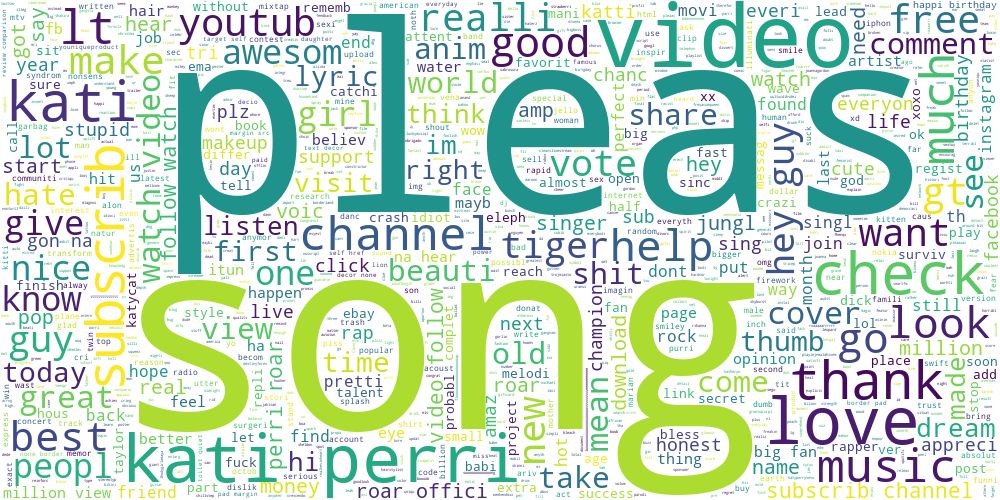

In [3]:
complete_process('youtube_comments.csv', process='stem')

Index(['DATE', 'CONTENT'], dtype='object')


,DATE,CONTENT
0,2014-07-22 15:27:50,i love this so much. AND also I Generate Free ...
1,2014-07-27 1:57:16,http://www.billboard.com/articles/columns/pop-...
2,2014-07-27 2:51:43,Hey guys! Please join me in my fight to help a...
3,2014-08-01 12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...
4,2014-08-01 21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...


The number of words in the document is 2973


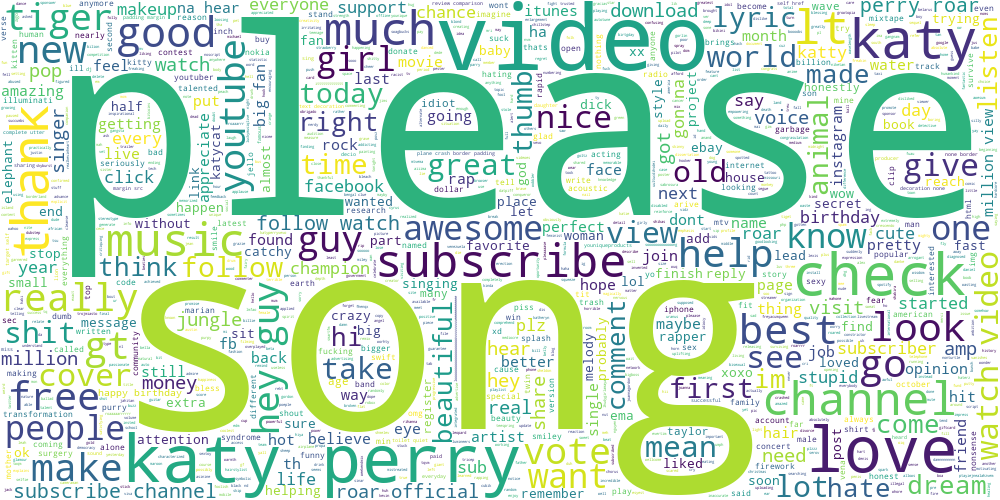

In [4]:
complete_process('youtube_comments.csv', process='lemma')